## 🏞️  **Notebook de avaliação {VAE - Fully Connected}**
***

> #### 📒 **Colab?**

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

!git clone https://github.com/cori4nder/vae-meandering-rivers

os.chdir('/content/vae-meandering-rivers')
!pwd

> ### 🔩 **Dependências**

In [ ]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [1]:
import torch
import torch.optim as optim

from eval.vae_evaluator import VAEEvaluator
from utils.hdf5_utils import HDF5DataHandler

from models.beta_vae_fully_connected import VAE_FConnected

> ### 🤖 **Avaliando modelo**

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
handler = HDF5DataHandler('../data/train_images.h5', test_size=0.2)

In [4]:
handler.load_data(split=True, norm=True)

| Keys  >>  ['train_images']
| Shape >> (50000, 128, 128, 1)
| Normalizaed images >> float32 / 255.0
| Train - 80.0% >> (40000, 1, 128, 128)
| Test  - 20.0% >> (10000, 1, 128, 128)


In [5]:
# handler.resize(new_size=(128, 128))
# transforma em tensores e gera os loaders
handler.prepare_tensors()

# Obtenção dos DataLoaders
train_loader, test_loader = handler.get_loaders()

In [6]:
img_size = 128
model = VAE_FConnected().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

evaluator = VAEEvaluator(model=model, device=device, image_size=img_size)

In [7]:
checkpoint_path = "./checkpoints/vae_fconnected_checkpoint_epoch_195.pth"  # Altere para o caminho correto do seu checkpoint
evaluator.load_model(checkpoint_path, optimizer)

| Loaded >> ./checkpoints/vae_fconnected_checkpoint_epoch_195.pth | Epoch >> 195


195

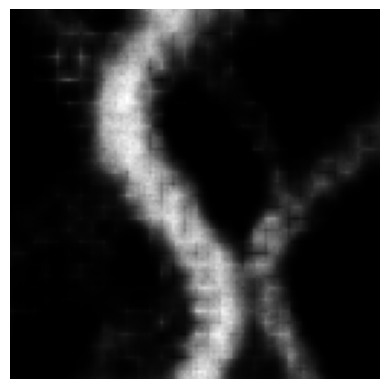

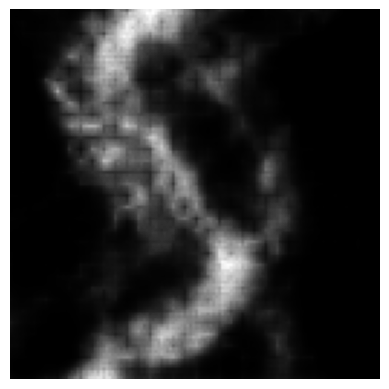

(None, None)

In [8]:
# Gera uma amostra do espaço latente
latent_values = [0.0, 1.0]  # Valores para as duas primeiras dimensões do espaço latente
latent_dim = 16  # Dimensão latente do modelo
evaluator.generate_latent_sample((0.2, 1.0), latent_dim), evaluator.generate_latent_sample((1.0, 0.0), latent_dim)

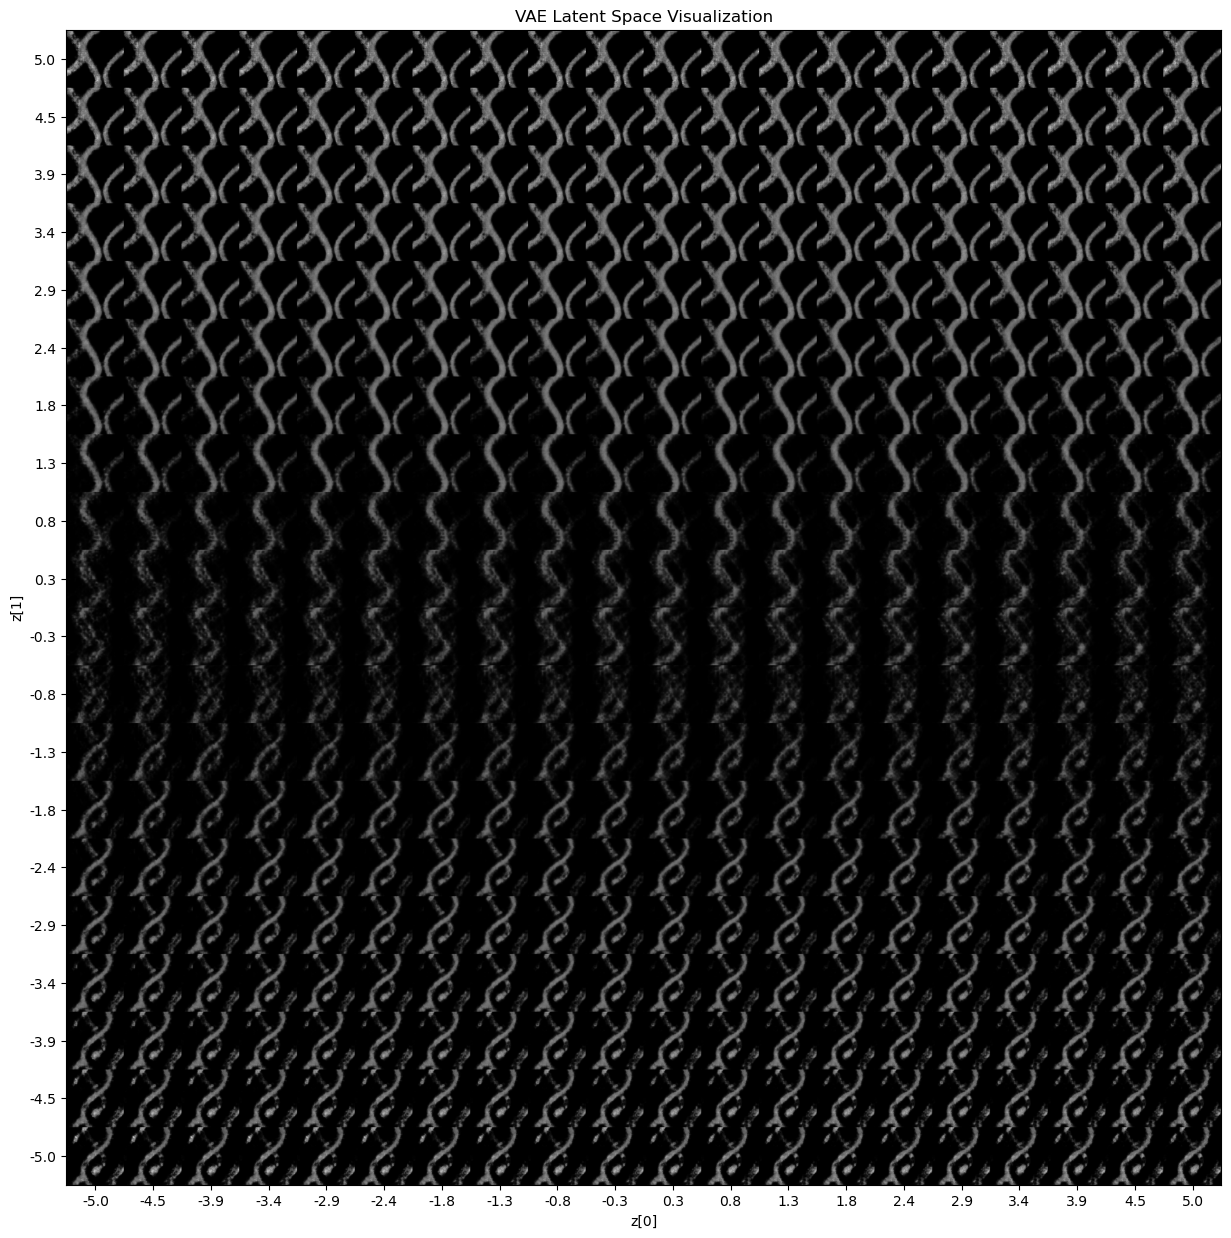

In [9]:
# Visualiza o espaço latente
evaluator.visualize_latent_space(scale=5.0, n=20)

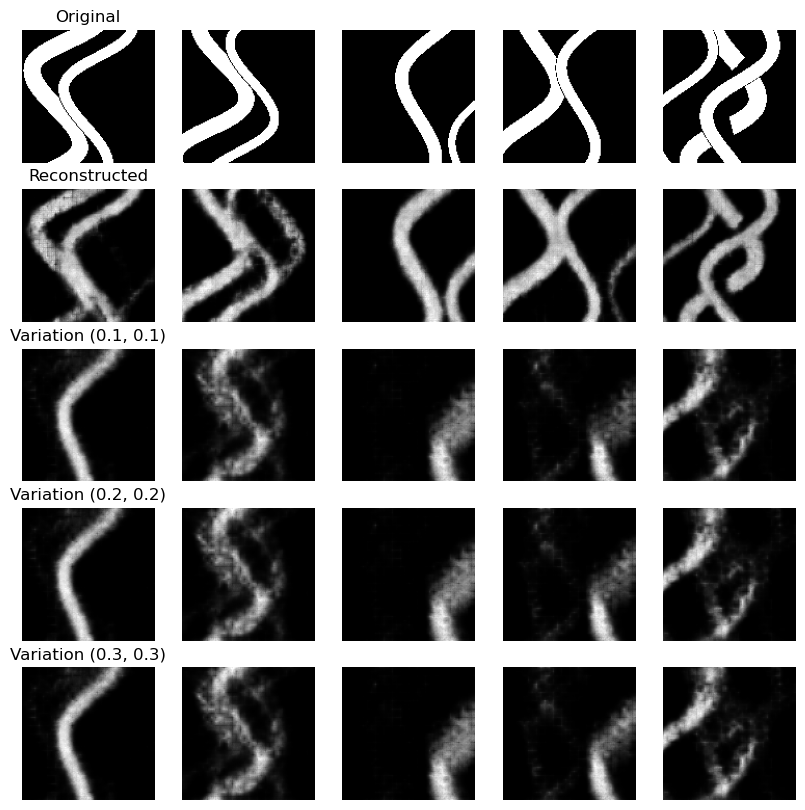

In [10]:
# Visualiza variações no espaço latente para um conjunto de imagens de teste
steps = [(0.1, 0.1), (0.2, 0.2), (0.3, 0.3)]  # Variações a serem aplicadas às dimensões latentes
num_images = 5  # Número de imagens para exibir
evaluator.visualize_latent_variations(test_loader, num_images=num_images, steps=steps)

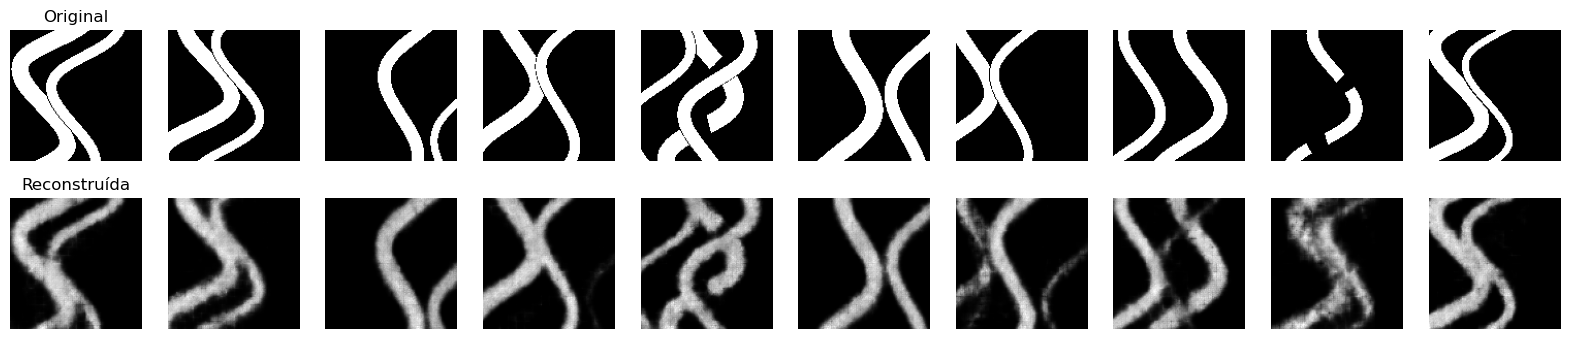

In [11]:
# Exibe as imagens originais e suas reconstruções
num_images = 10  # Número de imagens para exibir
evaluator.show_reconstructions(test_loader, num_images=num_images)